<a href="https://colab.research.google.com/github/vvvipindsm/Deep-Learning-for-Candle-Stick-Patterns-Identification/blob/master/Copy_of_Microsoft_Stock_Forecasting_with_LSTMs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# dataset @ https://finance.yahoo.com/quote/MSFT/history/

# If you want the exact same dataset as the YouTube video,
# use this link: https://drive.google.com/file/d/1WLm1AEYgU28Nk4lY4zNkGPSctdImbhJI/view?usp=sharing

In [71]:
import pandas as pd
import yfinance
df = yfinance.download(tickers = "TATAMOTORS.NS",start="2000-03-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)

df = df[[("TATAMOTORS.NS", "Open"), ("TATAMOTORS.NS", "High"), ("TATAMOTORS.NS", "Low"), ("TATAMOTORS.NS", "Close"),("TATAMOTORS.NS", "Volume")]]

# Select the desired columns using the MultiIndex
df = df[[('TATAMOTORS.NS', 'Open'), ('TATAMOTORS.NS', 'High'), ('TATAMOTORS.NS', 'Low'), ('TATAMOTORS.NS', 'Close'), ('TATAMOTORS.NS', 'Volume')]]

# Rename the columns for simplicity (optional)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df[["Open", "High", "Low", "Close","Volume"]]
df.head()

df

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Datetime,,,,,
2023-03-06 03:45:00+00:00,430.700012,433.950012,430.700012,432.700012,0
2023-03-06 04:45:00+00:00,432.549988,437.000000,432.299988,436.750000,1893172
2023-03-06 05:45:00+00:00,436.799988,438.000000,435.549988,436.850006,950581
2023-03-06 06:45:00+00:00,436.850006,438.000000,436.000000,436.950012,977900
2023-03-06 07:45:00+00:00,436.950012,440.750000,436.000000,439.600006,2576471
...,...,...,...,...,...
2024-12-24 05:45:00+00:00,740.500000,741.700012,735.750000,736.849976,1428571
2024-12-24 06:45:00+00:00,736.799988,738.400024,735.049988,738.200012,985676
2024-12-24 07:45:00+00:00,738.200012,738.900024,734.150024,737.200012,1079657


In [72]:
df

,Open,High,Low,Close,Volume
Datetime,,,,,
2023-03-06 03:45:00+00:00,430.700012,433.950012,430.700012,432.700012,0
2023-03-06 04:45:00+00:00,432.549988,437.000000,432.299988,436.750000,1893172
2023-03-06 05:45:00+00:00,436.799988,438.000000,435.549988,436.850006,950581
2023-03-06 06:45:00+00:00,436.850006,438.000000,436.000000,436.950012,977900
2023-03-06 07:45:00+00:00,436.950012,440.750000,436.000000,439.600006,2576471
...,...,...,...,...,...
2024-12-24 05:45:00+00:00,740.500000,741.700012,735.750000,736.849976,1428571
2024-12-24 06:45:00+00:00,736.799988,738.400024,735.049988,738.200012,985676
2024-12-24 07:45:00+00:00,738.200012,738.900024,734.150024,737.200012,1079657


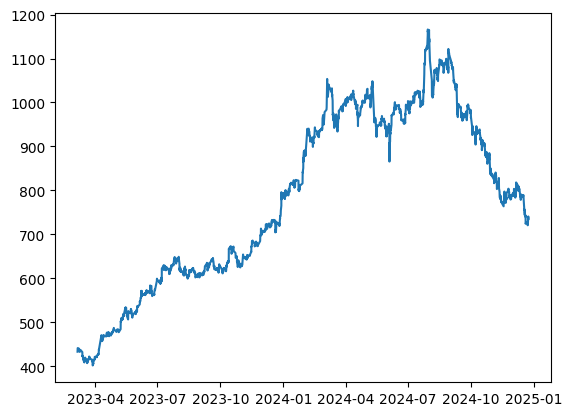

In [73]:
import matplotlib.pyplot as plt

plt.plot(df.index, df['Close'])

In [52]:
import datetime

def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)

datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [53]:
import numpy as np

def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date

  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)

    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['Close'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))

    if last_time:
      break

    target_date = next_date

    if target_date == last_date:
      last_time = True

  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates

  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]

  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(df,
                                '2021-03-25',
                                '2024-12-23',
                                n=3)
windowed_df

,Target Date,Target-3,Target-2,Target-1,Target
0,2021-03-25,301.178986,305.502136,292.632111,283.787018
1,2021-03-26,305.502136,292.632111,283.787018,294.570038
2,2021-03-30,292.632111,283.787018,294.570038,295.216034
3,2021-03-31,283.787018,294.570038,295.216034,299.936707
4,2021-04-01,294.570038,295.216034,299.936707,305.849976
...,...,...,...,...,...
920,2024-12-17,786.349976,790.299988,784.799988,779.750000
921,2024-12-18,790.299988,784.799988,779.750000,755.700012
922,2024-12-19,784.799988,779.750000,755.700012,744.049988
923,2024-12-20,779.750000,755.700012,744.049988,724.049988


In [22]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((925,), (925, 3, 1), (925,))

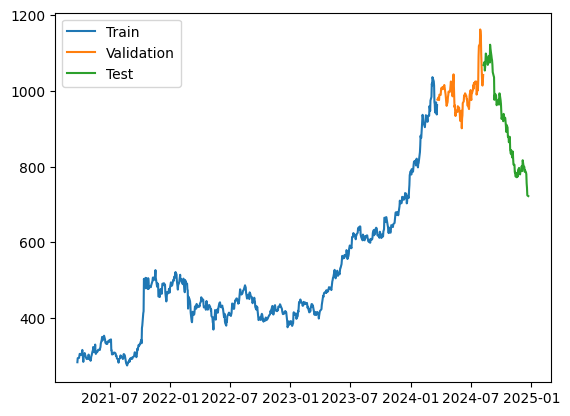

In [23]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train, y_train = dates[:q_80], X[:q_80], y[:q_80]

dates_val, X_val, y_val = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test, y_test = dates[q_90:], X[q_90:], y[q_90:]

plt.plot(dates_train, y_train)
plt.plot(dates_val, y_val)
plt.plot(dates_test, y_test)

plt.legend(['Train', 'Validation', 'Test'])

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse',
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100)

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 269712.6250 - mean_absolute_error: 493.6661 - val_loss: 989422.8750 - val_mean_absolute_error: 993.5344
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 263460.7500 - mean_absolute_error: 488.7002 - val_loss: 981248.0625 - val_mean_absolute_error: 989.4115
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 253699.3594 - mean_absolute_error: 478.9454 - val_loss: 959322.9375 - val_mean_absolute_error: 978.2690
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 232394.1719 - mean_absolute_error: 457.7744 - val_loss: 913906.1875 - val_mean_absolute_error: 954.7741
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 216333.2656 - mean_absolute_error: 438.5361 - val_loss: 827250.0625 - val_mean_absolute_error: 908.2594
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 169688.0781 - mean_absolute_error: 381.2406 - val_loss: 701312.3750 - val_mean_absolute_error: 836.0623
Epoch 7/100
24/24 ━━━

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


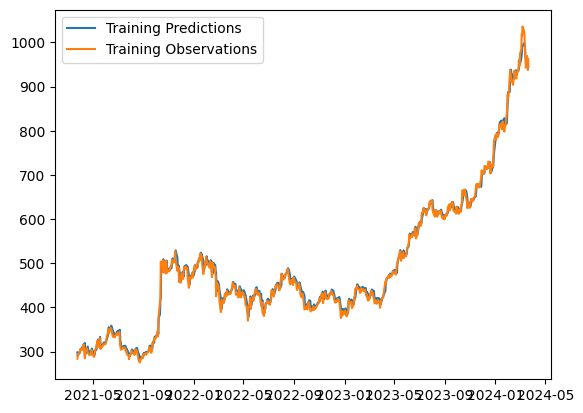

In [25]:
train_predictions = model.predict(X_train).flatten()

plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.legend(['Training Predictions', 'Training Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


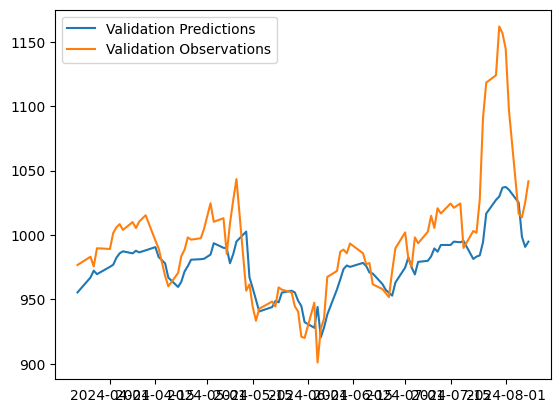

In [26]:
val_predictions = model.predict(X_val).flatten()
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.legend(['Validation Predictions', 'Validation Observations'])

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


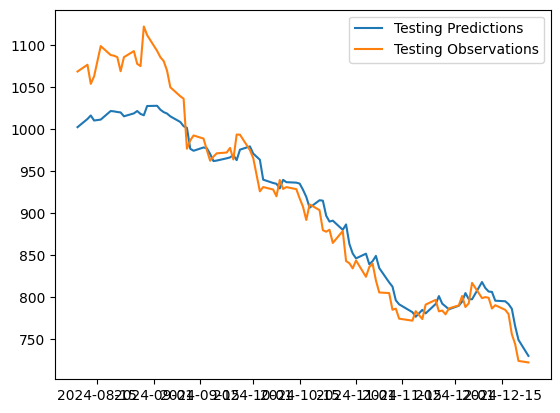

In [27]:
test_predictions = model.predict(X_test).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

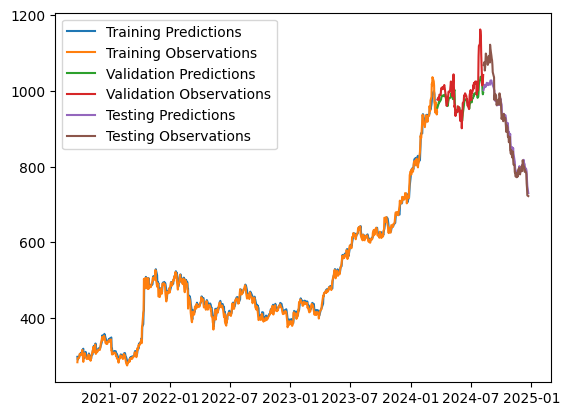

In [28]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations'])

In [29]:
from copy import deepcopy

recursive_predictions = []
recursive_dates = np.concatenate([dates_val, dates_test])

for target_date in recursive_dates:
  last_window = deepcopy(X_train[-1])
  next_prediction = model.predict(np.array([last_window])).flatten()
  recursive_predictions.append(next_prediction)
  last_window[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

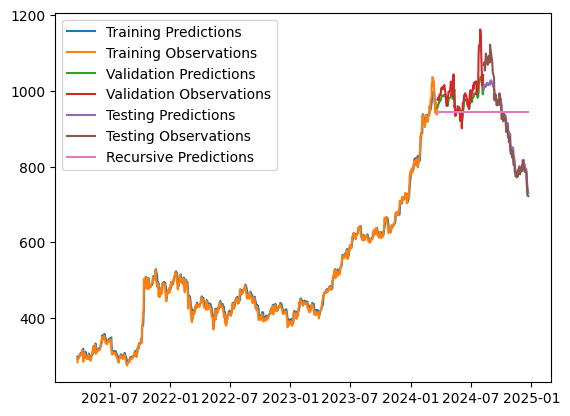

In [30]:
plt.plot(dates_train, train_predictions)
plt.plot(dates_train, y_train)
plt.plot(dates_val, val_predictions)
plt.plot(dates_val, y_val)
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test)
plt.plot(recursive_dates, recursive_predictions)
plt.legend(['Training Predictions',
            'Training Observations',
            'Validation Predictions',
            'Validation Observations',
            'Testing Predictions',
            'Testing Observations',
            'Recursive Predictions'])

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2023-11-06,650.841507,650.841507,641.221231,644.062439,10801301
2023-11-07,643.015686,647.900636,641.320904,643.015686,6588073
2023-11-08,646.006488,647.053246,639.925278,640.573242,6551864
2023-11-09,642.018778,651.639115,640.722790,647.352295,10155047
2023-11-10,647.352276,650.941237,642.018759,649.047058,6425792


In [67]:
import numpy as np
import pandas as pd
import yfinance


df = yfinance.download(tickers = "TATAMOTORS.NS",start="2023-11-06",
                               interval = "1d", group_by = 'ticker', auto_adjust = True)

df = df[[("TATAMOTORS.NS", "Open"), ("TATAMOTORS.NS", "High"), ("TATAMOTORS.NS", "Low"), ("TATAMOTORS.NS", "Close"),("TATAMOTORS.NS", "Volume")]]

# Select the desired columns using the MultiIndex
df = df[[('TATAMOTORS.NS', 'Open'), ('TATAMOTORS.NS', 'High'), ('TATAMOTORS.NS', 'Low'), ('TATAMOTORS.NS', 'Close'), ('TATAMOTORS.NS', 'Volume')]]

# Rename the columns for simplicity (optional)
df.columns = ['Open', 'High', 'Low', 'Close', 'Volume']
df = df[["Open", "High", "Low", "Close","Volume"]]


last_3_days = df['Close'].tail(3).values.reshape(1, 3, 1).astype(np.float32)
latest_prediction = model.predict(last_3_days).flatten()[0]
print(f"Predicted closing price for next day: {latest_prediction}")

[*********************100%***********************]  1 of 1 completed

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicted closing price for next day: 732.7230224609375
